# Quantum Fourier transform

In this section we will look at the implementation of the [quantum Fourier transform](https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform), as it is a cornerstone to a vast number of quantum algorithms.

The quantum Fourier transform is defined by the operation:

$$ |x\rangle \rightarrow \frac{1}{2^{n}}\sum^{2^{n}-1}_{j=0}\exp(i2\pi jx)|j\rangle $$

The corresponding matrix to perform this operation is defined in the function below:

In [1]:
def QFT(N):
    '''
    Constructing the fourier transform of size NxN.
    '''
    return np.array([[(np.exp(2.*i*j*1j*np.pi/N))
                   for j in np.arange(N)]
                    for i in np.arange(N)])*1./np.sqrt(N)

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
import qiskit_tools as qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Let us perform this action on 5 qubits:

In [3]:
n = 5

In [4]:
xreg = QuantumRegister(n, 'x')
circ = QuantumCircuit(xreg)

A quantum Fourier transform is applied across a given register using the command:

In [5]:
circ = qt.QFT(circ, xreg)

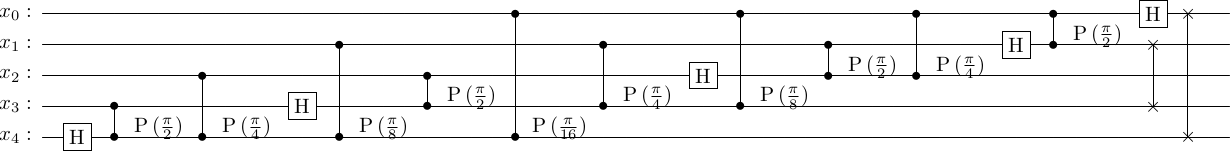

In [6]:
circ.draw(output="latex")

If we wish to retreive the matrix corresponding to the circuit defined above, we can run:

In [7]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()
unit_mat = np.array(result.get_unitary(circ, decimals=8))

Let's compare this to the result defined previously in the `QFT` function and find the mean-squared error between the two:

In [8]:
print(np.sum(np.abs(unit_mat-QFT(2**n))**2))

9.614736905519685e-15


We see that they are pretty similar!